In [1]:
import pickle
import os
import pandas as pd
from sklearn.metrics import classification_report,r2_score

In [2]:
os.chdir("D://Bright_Academy//ML project//")

In [3]:
cdata=pd.read_csv("classificationData.csv")

In [4]:
cdata.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
cdata

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,tempF,humidity,DepTime,...,Dest_JFK,Dest_LAS,Dest_LAX,Dest_MCO,Dest_MIA,Dest_ORD,Dest_PHX,Dest_SEA,Dest_SFO,ArrDel15
0,17.0,318.0,122.0,0.0,10.0,1025.0,100.0,44.0,72.0,1617.0,...,0,0,0,0,0,0,0,0,0,1.0
1,11.0,318.0,176.0,0.1,10.0,1023.0,100.0,49.0,91.0,2138.0,...,0,0,0,0,0,0,0,0,0,0.0
2,17.0,318.0,122.0,0.0,10.0,1024.0,100.0,46.0,73.0,1455.0,...,0,0,0,0,0,0,0,0,0,1.0
3,17.0,318.0,122.0,0.0,10.0,1024.0,100.0,46.0,73.0,1007.0,...,0,0,0,0,0,0,0,0,0,0.0
4,17.0,317.0,122.0,0.0,10.0,1025.0,100.0,47.0,81.0,911.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851416,2.0,194.0,122.0,0.0,10.0,1020.0,79.0,52.0,97.0,1931.0,...,0,0,0,0,0,0,0,0,1,0.0
1851417,5.0,320.0,119.0,0.0,10.0,1018.0,73.0,54.0,89.0,1213.0,...,0,0,0,0,0,0,0,0,1,0.0
1851418,5.0,142.0,116.0,0.0,10.0,1017.0,83.0,51.0,86.0,533.0,...,0,0,0,0,0,0,0,0,1,0.0
1851419,4.0,327.0,119.0,0.0,10.0,1018.0,55.0,54.0,85.0,850.0,...,0,0,0,0,0,0,0,0,1,0.0


In [6]:
classifier=pickle.load(open('cmodel.pkl','rb'))

In [7]:
ArrDel=cdata['ArrDel15'].values
ArrDelpred=classifier.predict(cdata.iloc[:,:-1].values)

In [8]:
print(classification_report(ArrDel,ArrDelpred))

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89   1463365
         1.0       0.59      0.80      0.68    388056

    accuracy                           0.84   1851421
   macro avg       0.76      0.83      0.79   1851421
weighted avg       0.87      0.84      0.85   1851421



In [9]:
regressor=pickle.load(open('rmodel.pkl','rb'))

In [10]:
cdata['ArrDelpred']=ArrDelpred

In [11]:
df=pd.read_csv('OHEdata.csv')
cdata['ArrTime']=df['ArrTime']

In [12]:
def computeDelay(df):
    delay=[]
    for i in range(len(df)):
        res=df['ArrTime'][i]-df['CRSArrTime'][i]
        if (res>=60):
            if (res<=100):
                res1=(60-(df['CRSArrTime'][i]%100))+(df['ArrTime'][i]%100)
                delay.append(res1)
            elif (res>100):
                flr=int(round(res,-2))//100
                res1=(60-(df['CRSArrTime'][i]%100))+60*flr+(df['ArrTime'][i]%100)
                delay.append(res1)
        else:
            delay.append(res)
    return delay

In [13]:
rdata=cdata[cdata['ArrDelpred']==1]

In [14]:
rdata=rdata.reset_index(drop=True)

In [15]:
rdata['Delay']=computeDelay(rdata)

In [16]:
rdata1=rdata.drop(['ArrDel15','ArrTime'],axis=1)

In [17]:
Delaypred=regressor.predict(rdata1.iloc[:,:-1].values)

In [18]:
print(r2_score(rdata['Delay'].values,Delaypred))

0.7585212577377172


# Regression analysis

In [19]:
rdata1['Delay'].describe()

count    529418.000000
mean        -72.984812
std         514.046634
min       -2384.000000
25%          -3.000000
50%          21.000000
75%          53.000000
max        1558.000000
Name: Delay, dtype: float64

In [20]:
from sklearn.metrics import mean_absolute_error

Range1:[15,100]

In [21]:
range1=rdata1[(rdata1['Delay']>=15) & (rdata1['Delay']<100)]

In [22]:
r2scores=[]
maes=[]
range1pred=regressor.predict(range1.iloc[:,:-1].values)
maes.append(mean_absolute_error(range1['Delay'].values,range1pred))
r2scores.append(r2_score(range1['Delay'].values,range1pred))

Range2:[100,200]

In [23]:
range2=rdata1[(rdata1['Delay']>=100) & (rdata1['Delay']<200)]
range2pred=regressor.predict(range2.iloc[:,:-1].values)
maes.append(mean_absolute_error(range2['Delay'].values,range2pred))
r2scores.append(r2_score(range2['Delay'].values,range2pred))

Range3:[200,500]

In [24]:
range3=rdata1[(rdata1['Delay']>=200) & (rdata1['Delay']<500)]
range3pred=regressor.predict(range3.iloc[:,:-1].values)
maes.append(mean_absolute_error(range3['Delay'].values,range3pred))
r2scores.append(r2_score(range3['Delay'].values,range3pred))

Range4:[500,1000]

In [25]:
range4=rdata1[(rdata1['Delay']>=500) & (rdata1['Delay']<1000)]
range4pred=regressor.predict(range4.iloc[:,:-1].values)
maes.append(mean_absolute_error(range4['Delay'].values,range4pred))
r2scores.append(r2_score(range4['Delay'].values,range4pred))

Range5:[1000,2000]

In [26]:
range5=rdata1[(rdata1['Delay']>=1000) & (rdata1['Delay']<2000)]
range5pred=regressor.predict(range5.iloc[:,:-1].values)
maes.append(mean_absolute_error(range5['Delay'].values,range5pred))
r2scores.append(r2_score(range5['Delay'].values,range5pred))

In [27]:
maes

[18.859764776776903,
 21.783713396129748,
 29.931543104845243,
 63.12605222734255,
 1426.6848657187993]

In [28]:
r2scores

[-73.50953105774796,
 -18.38184445603368,
 -3.175497681494898,
 -1.2751461943385816,
 -502.4814058789247]

[Text(0.5, 25.722222222222214, 'range'),
 Text(510.3244949494949, 0.5, 'R2 score value')]

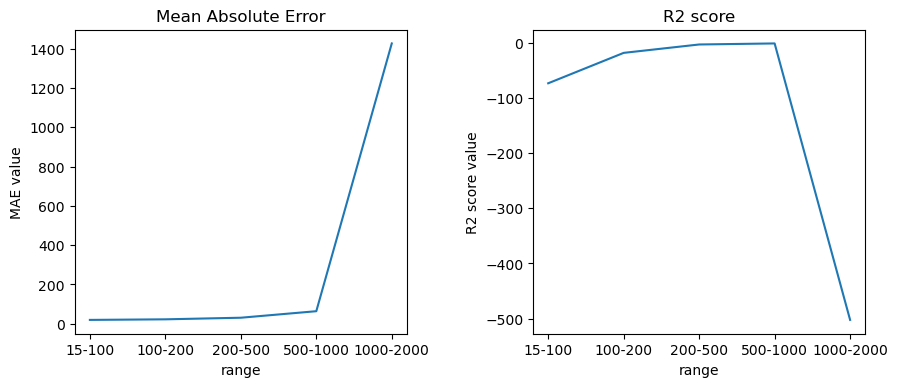

In [29]:
import matplotlib.pyplot as plt

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=6)
vals=['15-100','100-200','200-500','500-1000','1000-2000']

ax1.plot(vals,maes)
ax1.set_title("Mean Absolute Error")
ax1.set(xlabel="range", ylabel="MAE value")

ax2.plot(vals,r2scores)
ax2.set_title("R2 score")
ax2.set(xlabel="range",ylabel="R2 score value")


Text(0.5, 1.0, 'Number of samples belonging to each range bucket')

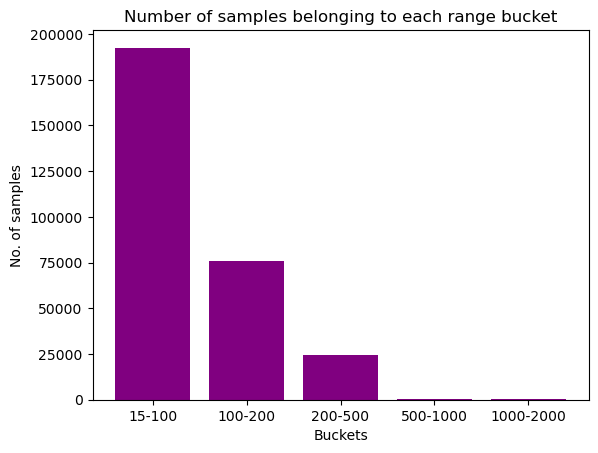

In [30]:
dct={'15-100':len(range1),'100-200':len(range2),'200-500':len(range3),'500-1000':len(range4),'1000-2000':len(range5)}
bins=dct.keys()
counts=dct.values()
plt.bar(bins,counts,color='purple')
plt.xlabel("Buckets")
plt.ylabel("No. of samples")
plt.title("Number of samples belonging to each range bucket")

In [31]:
print(counts)

dict_values([192498, 76119, 24684, 651, 633])


In [33]:
res=pd.DataFrame()
res['Interval Range']=vals
res['MAE']=maes
res

,Interval Range,MAE
0,15-100,18.859765
1,100-200,21.783713
2,200-500,29.931543
3,500-1000,63.126052
4,1000-2000,1426.684866
